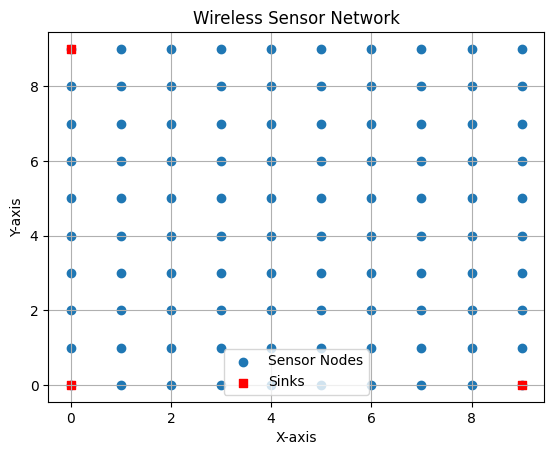

Without Intrusion:
Total hop count: 100
Total energy consumption: 399.0619773973467


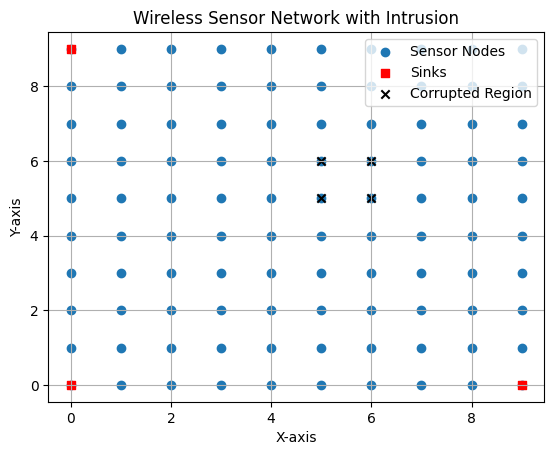


With Intrusion:
Total hop count: 100
Total energy consumption: 423.8352093569695


In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Function to find the nearest sink for each sensor node
def find_nearest_sink(node, sinks):
    distances = cdist([node], sinks)
    nearest_sink_idx = np.argmin(distances)
    return nearest_sink_idx

# Function to calculate the hop count and energy consumption
def simulate_wsn(nodes, sinks):
    hop_count = 0
    energy_consumption = 0

    for node in nodes:
        nearest_sink_idx = find_nearest_sink(node, sinks)
        distance = np.linalg.norm(node - sinks[nearest_sink_idx])
        hop_count += 1
        energy_consumption += distance

    return hop_count, energy_consumption

# Function to simulate intrusion and decay in energy consumption
def simulate_intrusion(nodes, sinks, corrupted_region):
    hop_count = 0
    energy_consumption = 0

    for node in nodes:
        nearest_sink_idx = find_nearest_sink(node, sinks)
        distance = np.linalg.norm(node - sinks[nearest_sink_idx])

        # Check if the node is in the corrupted region
        if tuple(node) in corrupted_region:
            distance *= 2  # Increase distance for nodes in the corrupted region

        hop_count += 1
        energy_consumption += distance

    return hop_count, energy_consumption

# Function to visualize the WSN with the corrupted region
def visualize_intrusion(nodes, sinks, corrupted_region):
    plt.scatter(nodes[:, 0], nodes[:, 1], marker='o', label='Sensor Nodes')
    plt.scatter(sinks[:, 0], sinks[:, 1], marker='s', color='red', label='Sinks')
    
    # Highlight the corrupted region
    corrupted_x, corrupted_y = zip(*corrupted_region)
    plt.scatter(corrupted_x, corrupted_y, marker='x', color='black', label='Corrupted Region')

    plt.title('Wireless Sensor Network with Intrusion')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set up the WSN parameters for a 10x10 grid
np.random.seed(42)
grid_size = 10
num_nodes = grid_size * grid_size
nodes_x, nodes_y = np.meshgrid(range(grid_size), range(grid_size))
nodes = np.column_stack((nodes_x.ravel(), nodes_y.ravel()))

sinks = np.array([[0, 0], [0, grid_size - 1], [grid_size - 1, 0]])  # Sinks at the corners

# Visualize the WSN
visualize_wsn(nodes, sinks)

# Simulate the WSN and print results
hop_count, energy_consumption = simulate_wsn(nodes, sinks)
print("Without Intrusion:")
print(f"Total hop count: {hop_count}")
print(f"Total energy consumption: {energy_consumption}")

# Simulate intrusion and decay in energy consumption
corrupted_region = [(5, 5), (5, 6), (6, 5), (6, 6)]  # Example of a corrupted region
visualize_intrusion(nodes, sinks, corrupted_region)

hop_count_intrusion, energy_consumption_intrusion = simulate_intrusion(nodes, sinks, corrupted_region)
print("\nWith Intrusion:")
print(f"Total hop count: {hop_count_intrusion}")
print(f"Total energy consumption: {energy_consumption_intrusion}")


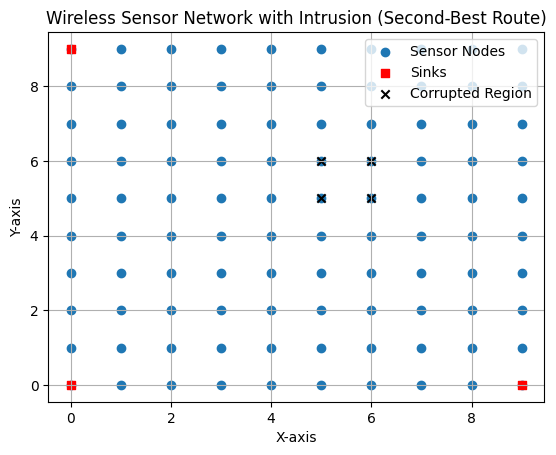


With Intrusion (Second-Best Route):
Total hop count: 100
Total energy consumption: 401.82227870951203


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Function to find the nearest sink for each sensor node
def find_nearest_sink(node, sinks):
    distances = cdist([node], sinks)
    nearest_sink_idx = np.argmin(distances)
    return nearest_sink_idx

# Function to find the second-nearest sink for each sensor node
def find_second_nearest_sink(node, sinks, nearest_sink_idx):
    distances = cdist([node], sinks)
    distances[0, nearest_sink_idx] = np.inf  # Exclude the nearest sink
    second_nearest_sink_idx = np.argmin(distances)
    return second_nearest_sink_idx

# Function to calculate the hop count and energy consumption considering intrusion
def simulate_intrusion(nodes, sinks, corrupted_region):
    hop_count = 0
    energy_consumption = 0

    for node in nodes:
        nearest_sink_idx = find_nearest_sink(node, sinks)
        distance = np.linalg.norm(node - sinks[nearest_sink_idx])

        # Check if the node is in the corrupted region
        if tuple(node) in corrupted_region:
            # Find the second-best route
            second_nearest_sink_idx = find_second_nearest_sink(node, sinks, nearest_sink_idx)
            distance = np.linalg.norm(node - sinks[second_nearest_sink_idx])
        
        hop_count += 1
        energy_consumption += distance

    return hop_count, energy_consumption

# Function to visualize the WSN with the corrupted region and second-best routes
def visualize_intrusion_with_second_best(nodes, sinks, corrupted_region):
    plt.scatter(nodes[:, 0], nodes[:, 1], marker='o', label='Sensor Nodes')
    plt.scatter(sinks[:, 0], sinks[:, 1], marker='s', color='red', label='Sinks')
    
    # Highlight the corrupted region
    corrupted_x, corrupted_y = zip(*corrupted_region)
    plt.scatter(corrupted_x, corrupted_y, marker='x', color='black', label='Corrupted Region')

    plt.title('Wireless Sensor Network with Intrusion (Second-Best Route)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set up the WSN parameters for a 10x10 grid
np.random.seed(42)
grid_size = 10
num_nodes = grid_size * grid_size
nodes_x, nodes_y = np.meshgrid(range(grid_size), range(grid_size))
nodes = np.column_stack((nodes_x.ravel(), nodes_y.ravel()))

sinks = np.array([[0, 0], [0, grid_size - 1], [grid_size - 1, 0]])  # Sinks at the corners

# Simulate intrusion with second-best route and print results
corrupted_region = [(5, 5), (5, 6), (6, 5), (6, 6)]  # Example of a corrupted region
visualize_intrusion_with_second_best(nodes, sinks, corrupted_region)

hop_count_intrusion, energy_consumption_intrusion = simulate_intrusion(nodes, sinks, corrupted_region)
print("\nWith Intrusion (Second-Best Route):")
print(f"Total hop count: {hop_count_intrusion}")
print(f"Total energy consumption: {energy_consumption_intrusion}")


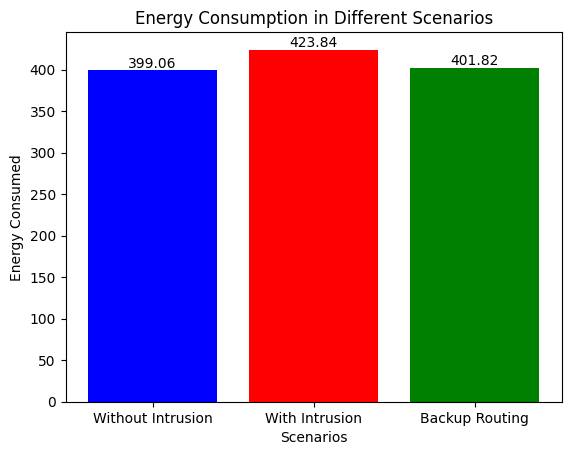

In [1]:
import matplotlib.pyplot as plt

# Results without intrusion
energy_consumption_without_intrusion = 399.0619773973467

# Results with intrusion
energy_consumption_with_intrusion = 423.8352093569695

# Results with intrusion (Second-Best Route)
energy_consumption_second_best_route = 401.82227870951203

# Create a bar chart
labels = ['Without Intrusion', 'With Intrusion', 'Backup Routing']
energy_consumptions = [energy_consumption_without_intrusion, energy_consumption_with_intrusion, energy_consumption_second_best_route]
colors = ['blue', 'red', 'green']

fig, ax = plt.subplots()

bars = ax.bar(labels, energy_consumptions, color=colors)

# Adding annotations to avoid label overlap
for bar, label in zip(bars, labels):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Scenarios')
plt.ylabel('Energy Consumed')
plt.title('Energy Consumption in Different Scenarios')
plt.show()
